# Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
#this command will display all columns of dataset

In [4]:
# import csv file
flight=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\Data_Train.csv")
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight.shape

(10683, 11)

dataset contains 10683 rows and 11 columns

In [6]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### out of 11 columns , 10 columns are object datatype or categorical columns and "price" is Continous type Label, In this dataset we have to predict label 'Price', so our problem is Regression type problem

In [7]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

feature "Route" and "Total_Stops" contain 1 missing values,which is categorical column so we will use mode method to replace null values

# Handling Missing Values

In [8]:
mode=flight['Route'].mode()[0]

here we find mode of column "Route" at index 0,

In [9]:
mode

'DEL ? BOM ? COK'

Here we get mode of "Route" at index 0

In [10]:
mode1=flight['Total_Stops'].mode()[0]
mode1

'1 stop'

mode1 find mode of feature "Total_Stops" at index 0

In [11]:
flight['Route']=flight['Route'].replace(np.nan,mode)
flight['Total_Stops']=flight['Total_Stops'].replace(np.nan,mode1)

now we replace both features null value by their respective mode

In [12]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

now dataset has no null values

In [13]:
flight['Date_of_Journey']=pd.to_datetime(flight['Date_of_Journey'], infer_datetime_format=True)  

the feature "Date_of_Journey" contains date in DDMMYYYY format but we want date in YYYYMMDD format so we infer datetime format

In [14]:
flight['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

here we get date in YYYYMMDD format

In [15]:
flight['date'] = pd.DatetimeIndex(flight['Date_of_Journey']).day
flight['year'] = pd.DatetimeIndex(flight['Date_of_Journey']).year
flight['month'] = pd.DatetimeIndex(flight['Date_of_Journey']).month

here feature "Date_of_Journey" has datatype Datetime ,but we want each date, month and year in separate column, with datatype integer, so we use this command

In [16]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  date             10683 non-null  int64         
 12  year             10683 non-null  int64         
 13  month            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object

now we get date, month and year in integer format

In [17]:
flight=flight.drop(columns=['Date_of_Journey','year'],axis=1)

As we dont need "Date_of_Journey" due to addtional three columns, we dont want "year" column beacause for flight duration it is useless

In [18]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Now separate departure time and Arrival time into hour and minutes

In [19]:
flight['Dep_hour']= pd.DatetimeIndex(flight['Dep_Time']).hour
flight['Dep_minute']= pd.DatetimeIndex(flight['Dep_Time']).minute

feature "Dep_Time" contains  departure hours and departure minutes, so we extract them in separate column

In [20]:
flight=flight.drop(columns=['Dep_Time'],axis=1)

We drop feature "Dep_Time" as we already made two separate feature from it

In [21]:
flight['Arrival_hour']= pd.DatetimeIndex(flight['Arrival_Time']).hour
flight['Arrival_minute']= pd.DatetimeIndex(flight['Arrival_Time']).minute

feature "Arrival_Time" contains departure hours and departure minutes, so we extract them in separate column

In [22]:
flight=flight.drop(columns=['Arrival_Time'],axis=1)

We drop feature "Arrival_Time" as we already made two separate feature from it

In [23]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


now we will convert duration into minutes

In [24]:
hour=flight['Duration'].str.extract('(d+)h',expand=False).astype(float)*60
minutes=flight['Duration'].str.extract('(d+)m',expand=False).astype(float)
flight['Total Duration(minutes)'] = (pd.to_timedelta(flight['Duration']).dt.seconds // 60).astype(int) 

Column "Duration"contains data in hours and in minutes,so want to convert it into total minutes, first we multiply hour by 60 to get convert into minutes and then minutes are added , so weget total duration in minutes

In [25]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Total Duration(minutes)
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,285


In [26]:
flight=flight.drop(columns=['Duration'],axis=1)

Due to new feature "Total Duration(minutes)" we will drop feature 'Duration'

In [27]:
flight.shape

(10683, 14)

now the columns are changed from 11 to 14

In [28]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline                  10683 non-null  object
 1   Source                   10683 non-null  object
 2   Destination              10683 non-null  object
 3   Route                    10683 non-null  object
 4   Total_Stops              10683 non-null  object
 5   Additional_Info          10683 non-null  object
 6   Price                    10683 non-null  int64 
 7   date                     10683 non-null  int64 
 8   month                    10683 non-null  int64 
 9   Dep_hour                 10683 non-null  int64 
 10  Dep_minute               10683 non-null  int64 
 11  Arrival_hour             10683 non-null  int64 
 12  Arrival_minute           10683 non-null  int64 
 13  Total Duration(minutes)  10683 non-null  int32 
dtypes: int32(1), int64(7), object(6)
memor

# Univariate Analysis

 In this section,we implement count plot for categorical data, w also found value counts and nunique values

In [29]:
flight['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [30]:
flight['Airline'].nunique()

12

<AxesSubplot:xlabel='Airline', ylabel='count'>

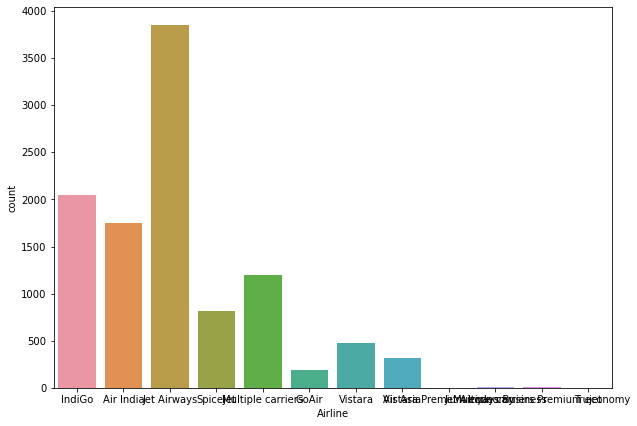

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(flight['Airline'])

In [32]:
flight['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [33]:
flight['Source'].nunique()

5

<AxesSubplot:xlabel='Source', ylabel='count'>

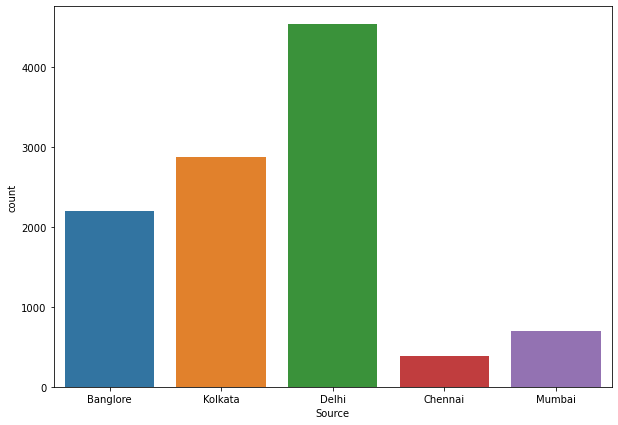

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(flight['Source'])

In [35]:
flight['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
flight['Destination'].nunique()

6

<AxesSubplot:xlabel='Destination', ylabel='count'>

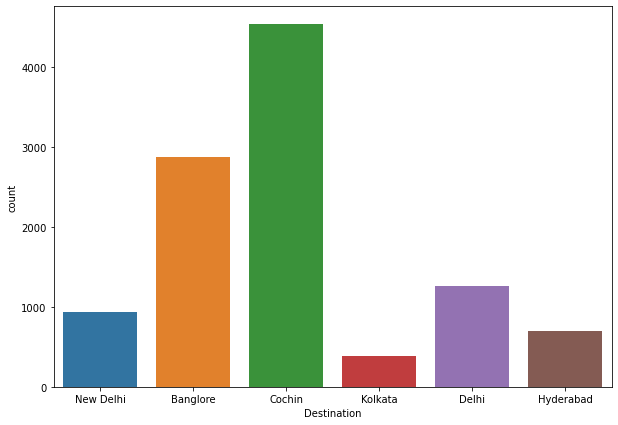

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(flight['Destination'])

In [38]:
flight['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
flight['Total_Stops'].nunique()

5

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

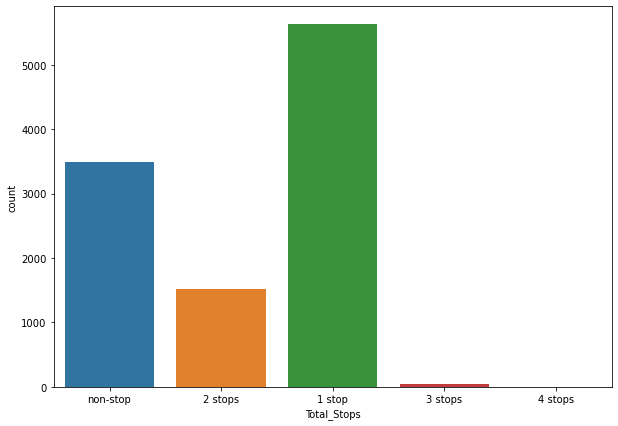

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(flight['Total_Stops'])

In [41]:
flight['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [42]:
flight['Additional_Info'].nunique()

10

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

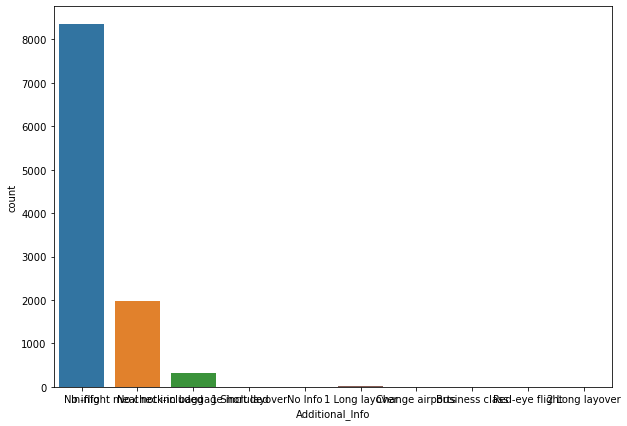

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(flight['Additional_Info'])

In [44]:
flight['Route'].value_counts()

DEL ? BOM ? COK                      2377
BLR ? DEL                            1552
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
                                     ... 
CCU ? IXB ? DEL ? BLR                   1
BOM ? COK ? MAA ? HYD                   1
BOM ? JLR ? HYD                         1
BLR ? CCU ? BBI ? HYD ? VGA ? DEL       1
BOM ? BLR ? CCU ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [45]:
flight['Route'].nunique()

128

<AxesSubplot:xlabel='Route', ylabel='count'>

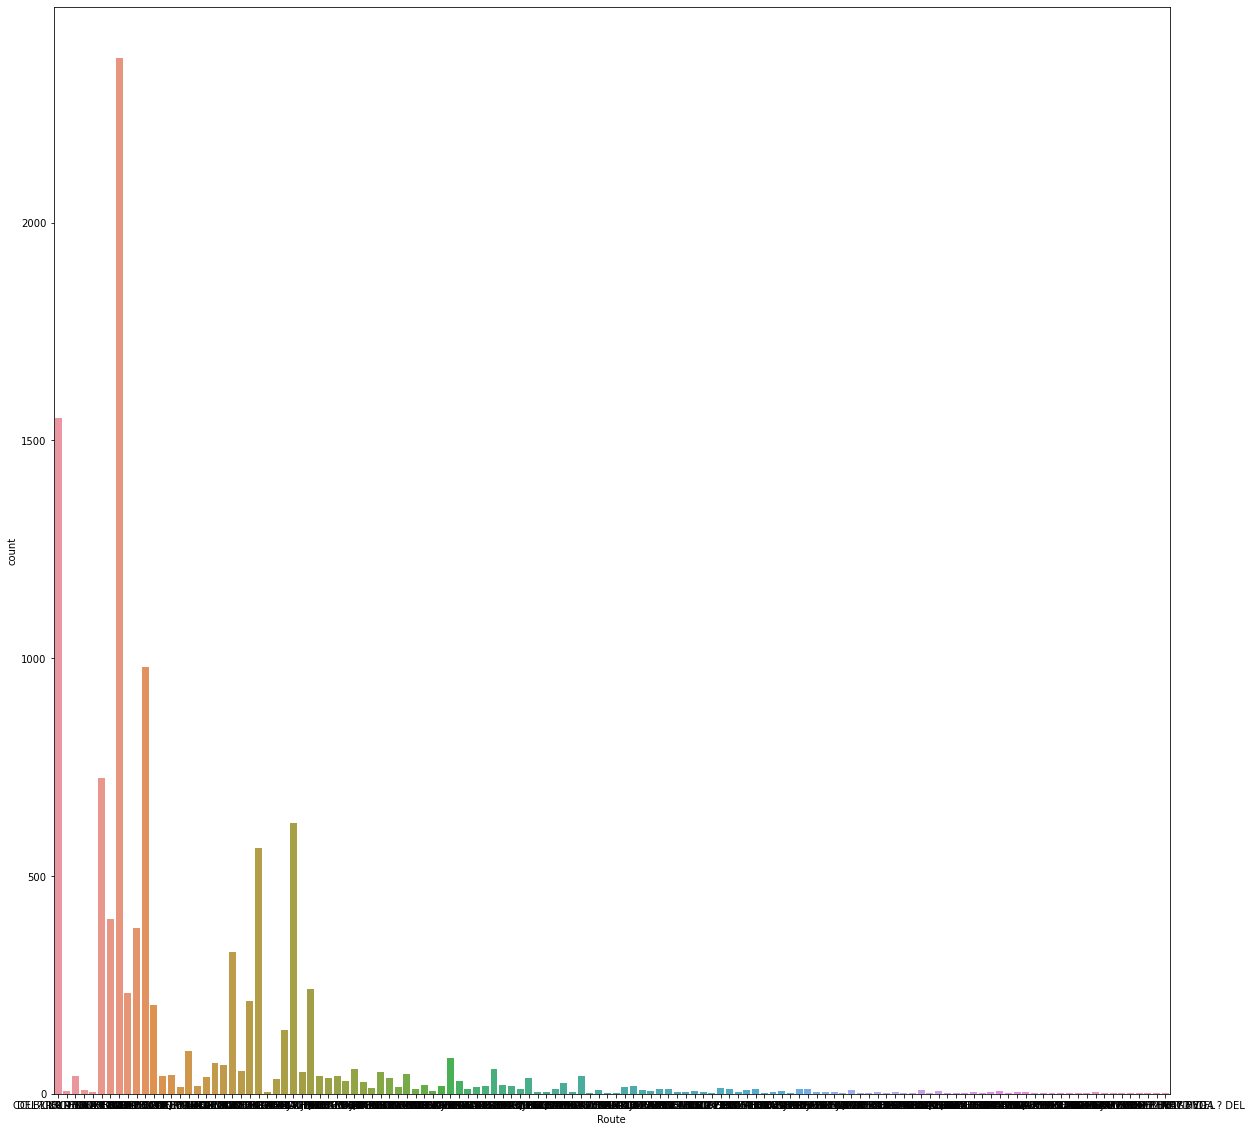

In [46]:
plt.figure(figsize=(20,20))
sns.countplot(flight['Route'])

# Bivariate Analysis

In this section , we will plot violin plot, y is our data label, x is feature, values are arranged in descending order

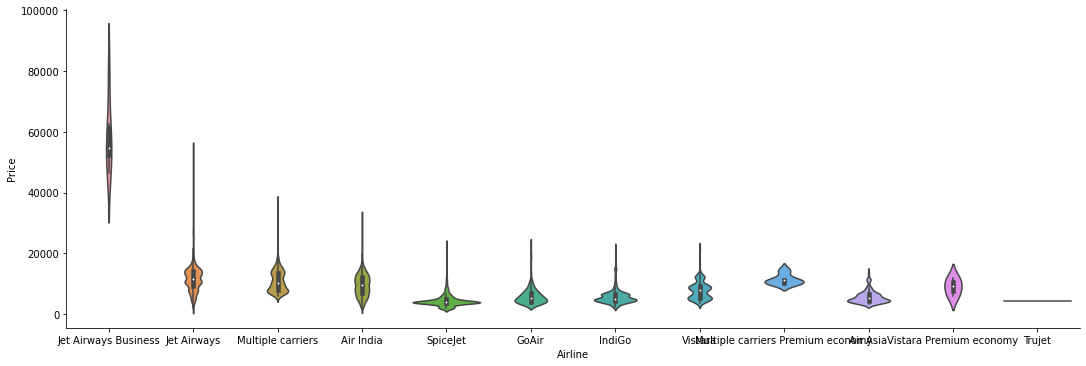

In [47]:
sns.catplot(x='Airline',y="Price",data=flight.sort_values("Price",ascending=False),kind="violin",height=5,aspect=3)

 here we can see that price for 'Jet Airways' is highest and lowest for trujet

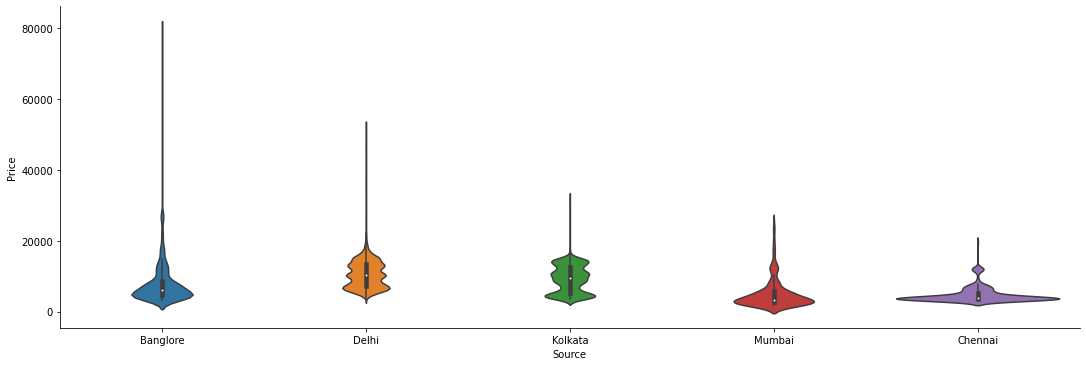

In [48]:
sns.catplot(x='Source',y="Price",data=flight.sort_values("Price",ascending=False),kind="violin",height=5,aspect=3)

here we can see that "Banglore" is highest and 'Chennai' is lowest

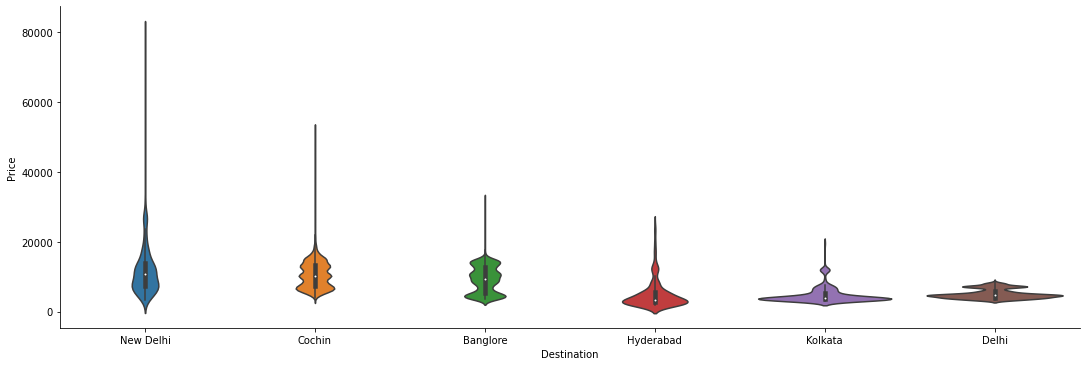

In [49]:
sns.catplot(x='Destination',y="Price",data=flight.sort_values("Price",ascending=False),kind="violin",height=5,aspect=3)

Here "Destination" new delhi has highest price and delhi is lowest

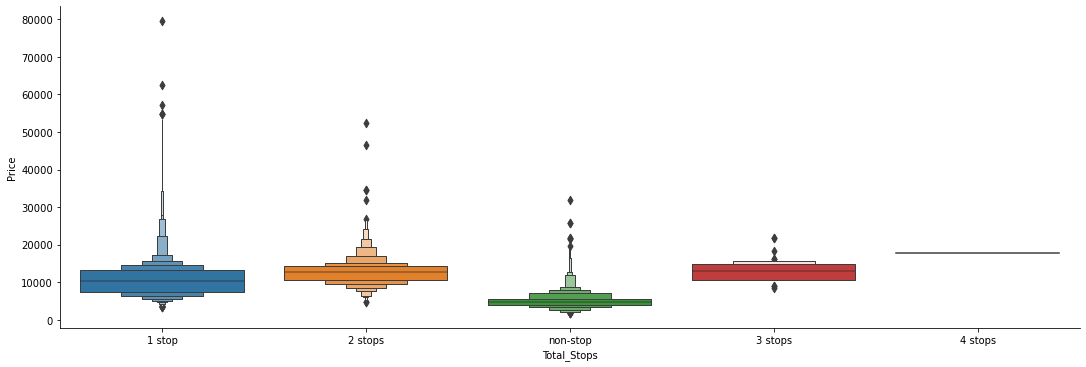

In [50]:
sns.catplot(x='Total_Stops',y="Price",data=flight.sort_values("Price",ascending=False),kind="boxen",height=5,aspect=3)

here we changed the kind of catplot, we select 'Boxplot', which shows highest prices for 1 stop and lowest price for 4 stops

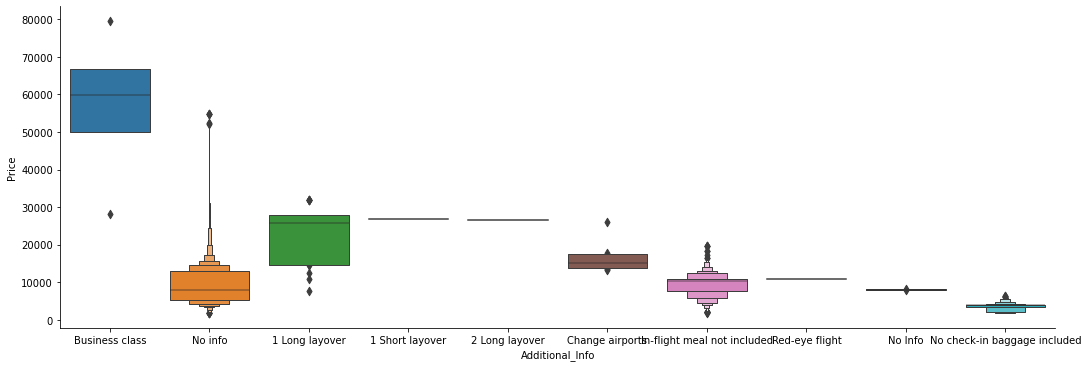

In [51]:
sns.catplot(x='Additional_Info',y="Price",data=flight.sort_values("Price",ascending=False),kind="boxen",height=5,aspect=3)

"Additional_Info" has highest price for business class 

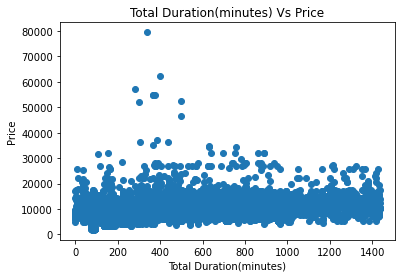

In [52]:
plt.scatter(x=flight['Total Duration(minutes)'],y=flight['Price'])
plt.xlabel("Total Duration(minutes)")
plt.ylabel("Price")
plt.title("Total Duration(minutes) Vs Price")
plt.show()

in this scatter plot we can see that, total minutes are uniformely distrubuted,some point shows high prices, but most of point shows less price upto 30000 

# Encoding

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

flight['Route']=le.fit_transform(flight['Route'])
flight['Additional_Info']=le.fit_transform(flight['Additional_Info'])
flight['Airline']=le.fit_transform(flight['Airline'])
flight=pd.get_dummies(flight,columns=['Total_Stops','Destination','Source'])

The feature "'Route",'Additional_Info','Airline' is object data type ,but it contain large class number, so we use label encoding, which assigns number from 0 to n-1, where n is number of classes.
for remaining feature "Total_Stops",'Destination','Source' has fewer classes , so i used one hot encoding, which generate number of columns for number of classes, for example, if a feature has 4 class , then one hot encoding create 4 news columns for each class

In [54]:
flight.head()

,Airline,Route,Additional_Info,Price,date,month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Total Duration(minutes),Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,18,8,3897,24,3,22,20,1,10,170,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,1,84,8,7662,1,5,5,50,13,15,445,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,4,118,8,13882,9,6,9,25,4,25,1140,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,3,91,8,6218,12,5,18,5,23,30,325,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,3,29,8,13302,1,3,16,50,21,35,285,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


here we can see that all categorical values are replaced by numerical values with increased number of columns

In [55]:
flight.shape

(10683, 27)

Now we have total 27 columns now ,due to feature engineering.

### As all columns except label"Price" are categorical in nature, so we will not use Method like Outlier detections and Skewness removal, as we know that this method are applicable on continous featues only, also we will not use any scaling method.

# Multivariate Analysis

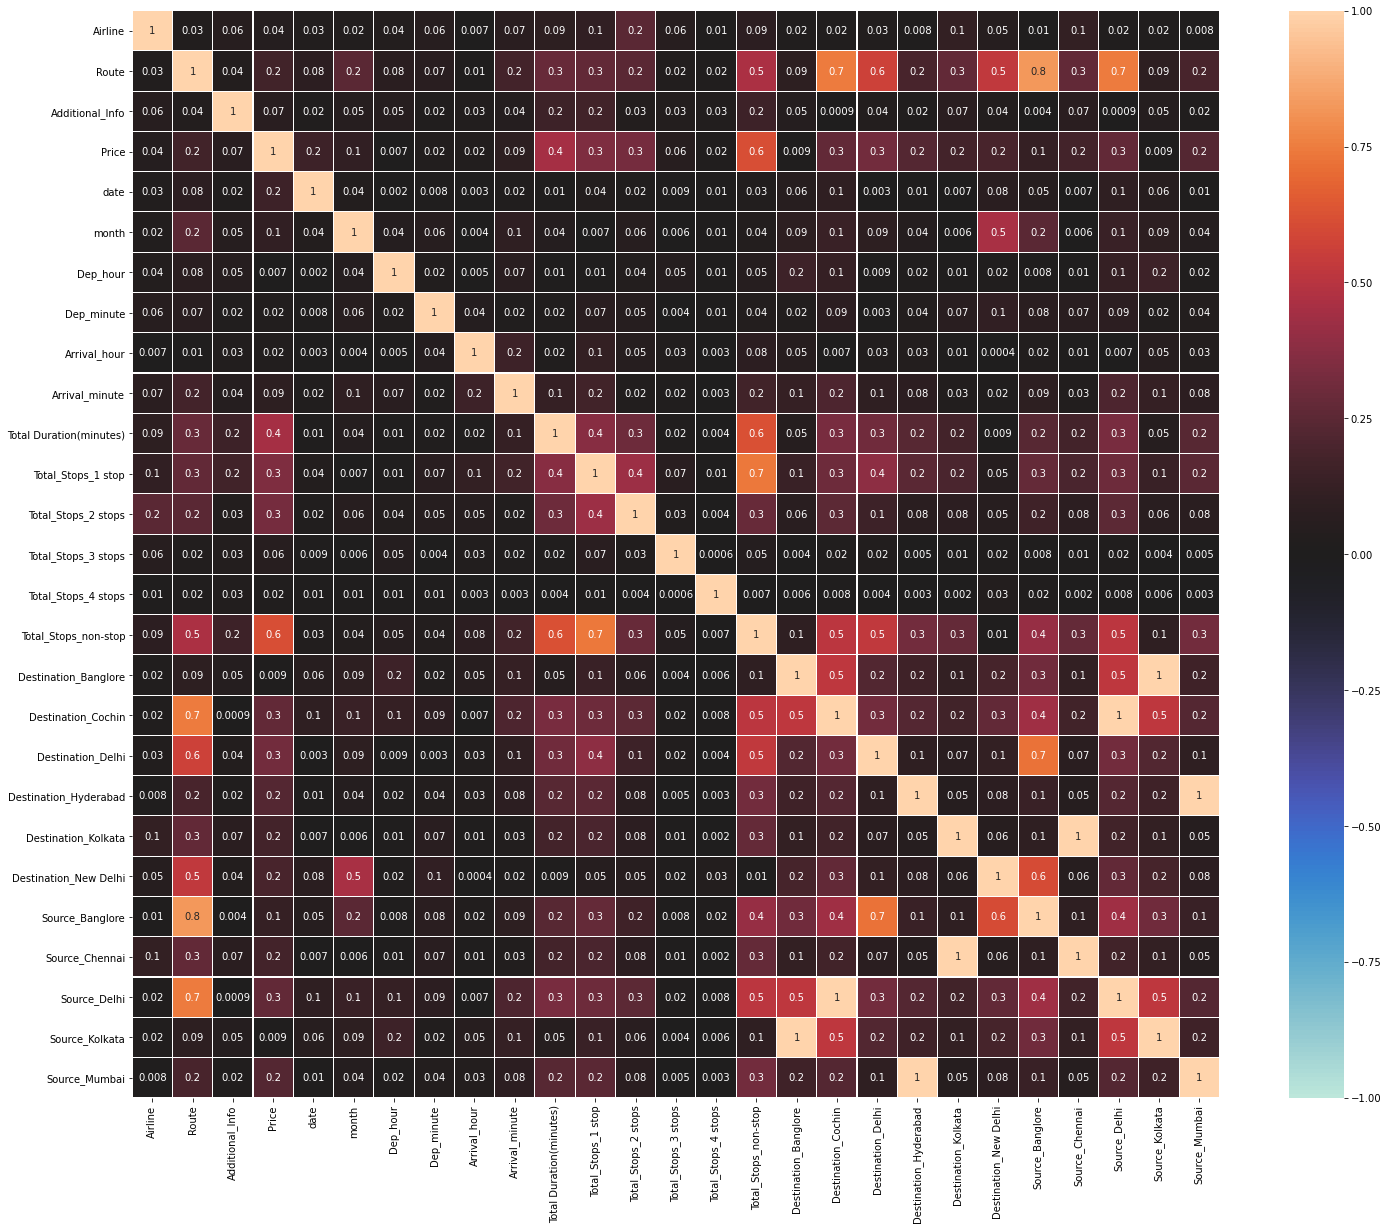

In [56]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
flight_corr=flight.corr().abs()
plt.figure(figsize=(25,20))
sns.heatmap(flight_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

here we get multi collinearity for all feature, but our data in categorical in nature, so we will do any opeartion on the data

In [57]:
corr_matrix=flight.corr()   # here we get values of correlation in descending order
corr_matrix['Price'].sort_values(ascending=False)

Price                      1.000000
Total Duration(minutes)    0.449471
Total_Stops_1 stop         0.344600
Total_Stops_2 stops        0.320517
Source_Delhi               0.270619
Destination_Cochin         0.270619
Destination_New Delhi      0.189785
Route                      0.164118
Total_Stops_3 stops        0.056771
Arrival_hour               0.024264
Total_Stops_4 stops        0.018043
Destination_Banglore       0.009377
Source_Kolkata             0.009377
Dep_hour                   0.006819
Dep_minute                -0.024492
Airline                   -0.039520
Additional_Info           -0.065478
Arrival_minute            -0.086155
month                     -0.103651
Source_Banglore           -0.118026
date                      -0.153738
Destination_Kolkata       -0.179216
Source_Chennai            -0.179216
Destination_Hyderabad     -0.230745
Source_Mumbai             -0.230745
Destination_Delhi         -0.313401
Total_Stops_non-stop      -0.613760
Name: Price, dtype: float64

In [58]:
x=flight.drop(columns=['Price'])
y=flight['Price']

 here we separated feature from label, x contains only feature and y contains label

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance r2 score is statistical measure that repesent proportion of variance for dependant variable

In [60]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
maxr2=0  # initially max r2 is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    r2=r2_score(y_test,pred) # genrate r2 score by comparing test label and predicted label
    if r2> maxr2:
        maxr2=r2 # assign r2 score to max r2
        MaxRs=i  # the number at which we get max r2 is treated as random state
print('Best r2 is',maxr2,"on Random state",MaxRs)

Best r2 is 0.8916386029074095 on Random state 76


By using this code , we get best Random state when r2 score for each random state is checked, and the state at which we get highest  r2 score, is considered as best random state

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

In train test split we pass x  and y output, test size is 25% and random state is MaxRs which is generated by above code

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

now we want to build total six regression model

In [63]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression


LinearRegression()

In [64]:
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data

0.5014667569678523

In [65]:
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)

0.48559589964973093

In [66]:
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.48559589964973093

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [68]:
mean_absolute_error(y_test,pred1)

2329.109210251129

mean absolute error -it represent average error

In [69]:
mean_squared_error(y_test,pred1)

11681547.54836625

It is similar to MAE but noise is largerand large error are punished.it is harder to interpret than MAE as it is not in base units

In [70]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.5521157243784927

KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [71]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.8919055860027572

Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [72]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.8998513751900488

It is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [73]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.35935820076968616

Adaboost regressor is meta estimator that begin by fitting a regressor on original dataset, and then fits additional copies of regressor on same dataset but where the weights of instance are adjusted

In [74]:
svr=SVR()
svr.fit(x_train,y_train)
pred6=svr.predict(x_test)
SVR__score=r2_score(y_test,pred6)
SVR__score

0.09336475961237056

SVR is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [75]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [76]:
Linear_regression_cv_score=cross_val_score(Li_reg,x,y,cv=5).mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.49448358451758895

In [77]:
KNR_CV_score=cross_val_score(KNR,x,y,cv=5).mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.5823889894103389

In [78]:
DTR_CV_score=cross_val_score(DTR,x,y,cv=5).mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

0.8202623737893167

In [79]:
RFR_CV_score=cross_val_score(RFR,x,y,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

0.8982155646739887

In [80]:
ABR_CV_score=cross_val_score(ABR,x,y,cv=5).mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.2862659059672653

In [81]:
SVR_CV_score=cross_val_score(svr,x,y,cv=5).mean() # we pass model Support Vector Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
SVR_CV_score

0.10484334459562043

In [82]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)
SVR_diff=SVR__score*100-SVR_CV_score*100
print("SVR_diff",SVR_diff)

Linear_regression_diff -0.8887684867857999
KNR_diff -3.027326503184625
DTR_diff 7.1643212213440535
RFR_diff 0.1635810516060161
ABR_diff 7.309229480242088
SVR_diff -1.1478584983249878


In above line, we take difference of r2 score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [83]:
print("Linear_regression_score",Linear_regression_score*100)
print("Linear_regression_cv_score", Linear_regression_cv_score*100)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score*100)
print("KNR_CV_score",KNR_CV_score*100)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score*100)
print("DTR_CV_score", DTR_CV_score*100)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score*100)
print("RFR_CV_score",RFR_CV_score*100)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score*100)
print("ABR_CV_score",ABR_CV_score*100)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")
print("SVR__score",SVR__score*100)
print("SVR_CV_score",SVR_CV_score*100) 
print("SVR_diff",SVR_diff)


Linear_regression_score 48.55958996497309
Linear_regression_cv_score 49.44835845175889
Linear_regression_diff -0.8887684867857999
-------------------------------------------------------------------------------------------
KNR__score 55.21157243784926
KNR_CV_score 58.23889894103389
KNR_diff -3.027326503184625
-------------------------------------------------------------------------------------------
DTR__score 89.19055860027572
DTR_CV_score 82.02623737893167
DTR_diff 7.1643212213440535
-------------------------------------------------------------------------------------------
RFR__score 89.98513751900488
RFR_CV_score 89.82155646739886
RFR_diff 0.1635810516060161
-------------------------------------------------------------------------------------------
ABR__score 35.93582007696862
ABR_CV_score 28.62659059672653
ABR_diff 7.309229480242088
-------------------------------------------------------------------------------------------
SVR__score 9.336475961237056
SVR_CV_score 10.48433445956204

here we get r2 score, cv score and difference between them for each model, for Random forest regressor, we get highest r2 score and highest cvscore , also difference between them is also very less. So we will conclude that RFR is best model for flight price prediction, lets do hyperparameter tuning for Random forest regressor 

In [84]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also



In [85]:
params={'n_estimators':[10,12,13],
       'criterion':['mse'],
       'max_depth':[10,15],
       'min_samples_leaf':[5,6],
       'min_samples_split':[10,11]}

Here we created list of parameter for Random Forest Regressor

In [86]:
Grid_RFR=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)
Grid_RFR.fit(x_train,y_train)
Grid_RFR.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 13}

now we will pass this parameter to Random forest classifier to get best r2 score

In [132]:
Final_RFR=RandomForestRegressor(criterion='mse',max_depth=15,min_samples_leaf= 5,min_samples_split=10,n_estimators=13)
Final_RFR.fit(x_train,y_train)
final_pred=Final_RFR.predict(x_test)
final_score=r2_score(y_test,final_pred)
print(final_score*100)

84.05638949335173


here we get r2 score in between 83 to 85 for Random forest regressor

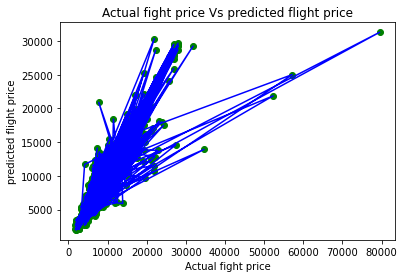

In [133]:
plt.scatter(y_test,final_pred,color='g')  # plot scatter of actual sales Vs predicted sales
plt.plot(y_test,final_pred,color='b') # here we plot line plot for actual sales vs predicted sales
plt.xlabel("Actual fight price") # x axis label is "Actual Sales"
plt.ylabel("predicted flight price")# y axis label is "predicted sales"
plt.title('Actual fight price Vs predicted flight price') # Titel is given
plt.show()  # display graph

In [89]:
import joblib
joblib.dump(Final_RFR,"Flight Price Prediction.pkl")

['Flight Price Prediction.pkl']

Here we saved our model sucessfully

# Now we use test dataset for same project, which does not contain output label, we will use same step as used above, and predict labels

In [90]:
flight_testing=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\Test_set.csv")
flight_testing.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


here we read csv file of test data for flight

In [91]:
flight_testing.shape


(2671, 10)

In [92]:
flight_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [93]:
flight_testing.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [94]:
flight_testing['Date_of_Journey']=pd.to_datetime(flight_testing['Date_of_Journey'], infer_datetime_format=True)  

In [95]:
flight_testing['Date_of_Journey']

0      2019-06-06
1      2019-12-05
2      2019-05-21
3      2019-05-21
4      2019-06-24
          ...    
2666   2019-06-06
2667   2019-03-27
2668   2019-06-03
2669   2019-06-03
2670   2019-06-15
Name: Date_of_Journey, Length: 2671, dtype: datetime64[ns]

In [96]:
flight_testing['date'] = pd.DatetimeIndex(flight_testing['Date_of_Journey']).day
flight_testing['year'] = pd.DatetimeIndex(flight_testing['Date_of_Journey']).year
flight_testing['month'] = pd.DatetimeIndex(flight_testing['Date_of_Journey']).month

In [97]:
flight_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   object        
 6   Arrival_Time     2671 non-null   object        
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
 10  date             2671 non-null   int64         
 11  year             2671 non-null   int64         
 12  month            2671 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 271.4+ KB


In [98]:
flight_testing=flight_testing.drop(columns=['Date_of_Journey','year'],axis=1)

In [99]:
flight_testing.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,date,month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [100]:
flight_testing['Dep_hour']= pd.DatetimeIndex(flight_testing['Dep_Time']).hour
flight_testing['Dep_minute']= pd.DatetimeIndex(flight_testing['Dep_Time']).minute

In [101]:
flight_testing=flight_testing.drop(columns=['Dep_Time'],axis=1)

In [102]:
flight_testing['Arrival_hour']= pd.DatetimeIndex(flight_testing['Arrival_Time']).hour
flight_testing['Arrival_minute']= pd.DatetimeIndex(flight_testing['Arrival_Time']).minute

In [103]:
flight_testing=flight_testing.drop(columns=['Arrival_Time'],axis=1)

In [104]:
flight_testing.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [105]:
hour=flight_testing['Duration'].str.extract('(d+)h',expand=False).astype(float)*60
minutes=flight_testing['Duration'].str.extract('(d+)m',expand=False).astype(float)
flight_testing['Total Duration(minutes)'] = (pd.to_timedelta(flight_testing['Duration']).dt.seconds // 60).astype(int) 

In [106]:
flight_testing.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Total Duration(minutes)
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,5,12,6,20,10,20,240
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,1425
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,8,0,21,0,780
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,170


In [107]:
flight_testing=flight_testing.drop(columns=['Duration'],axis=1)

In [108]:
flight_testing.shape

(2671, 13)

In [109]:
flight_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline                  2671 non-null   object
 1   Source                   2671 non-null   object
 2   Destination              2671 non-null   object
 3   Route                    2671 non-null   object
 4   Total_Stops              2671 non-null   object
 5   Additional_Info          2671 non-null   object
 6   date                     2671 non-null   int64 
 7   month                    2671 non-null   int64 
 8   Dep_hour                 2671 non-null   int64 
 9   Dep_minute               2671 non-null   int64 
 10  Arrival_hour             2671 non-null   int64 
 11  Arrival_minute           2671 non-null   int64 
 12  Total Duration(minutes)  2671 non-null   int32 
dtypes: int32(1), int64(6), object(6)
memory usage: 261.0+ KB


In [110]:
flight_testing['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [111]:
flight_testing['Airline'].nunique()

11

<AxesSubplot:xlabel='Airline', ylabel='count'>

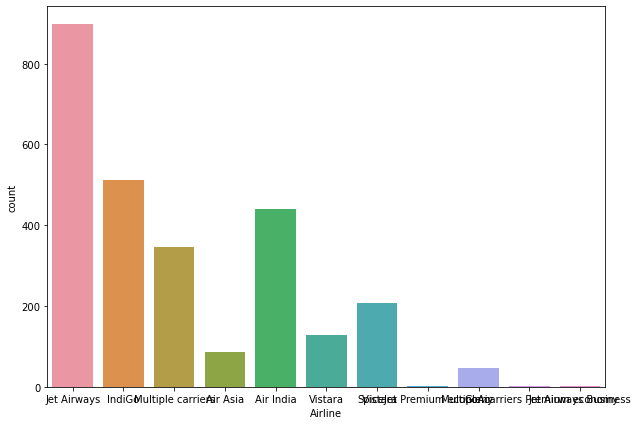

In [112]:
plt.figure(figsize=(10,7))
sns.countplot(flight_testing['Airline'])

In [113]:
flight_testing['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [114]:
flight_testing['Source'].nunique()

5

<AxesSubplot:xlabel='Source', ylabel='count'>

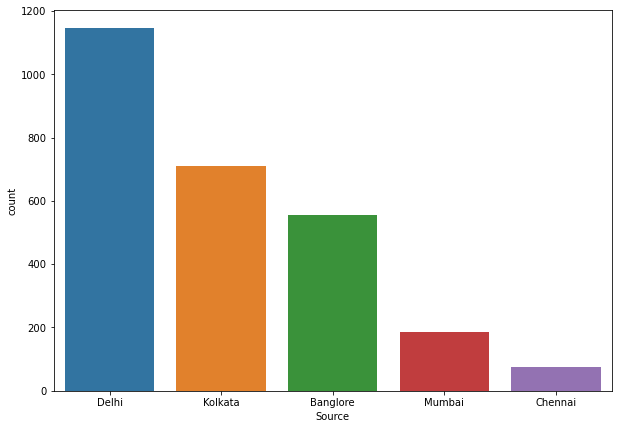

In [115]:
plt.figure(figsize=(10,7))
sns.countplot(flight_testing['Source'])

In [116]:
flight_testing['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [117]:
flight_testing['Destination'].nunique()

6

<AxesSubplot:xlabel='Destination', ylabel='count'>

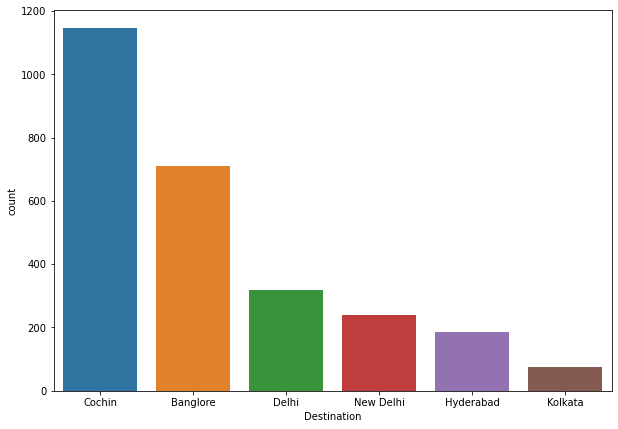

In [118]:
plt.figure(figsize=(10,7))
sns.countplot(flight_testing['Destination'])

In [119]:
flight_testing['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [120]:
flight_testing['Total_Stops'].nunique()

5

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

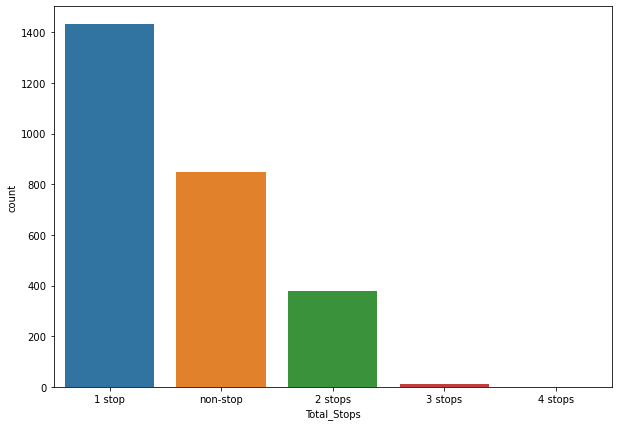

In [121]:
plt.figure(figsize=(10,7))
sns.countplot(flight_testing['Total_Stops'])

In [122]:
flight_testing['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [123]:
flight_testing['Additional_Info'].nunique()

6

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

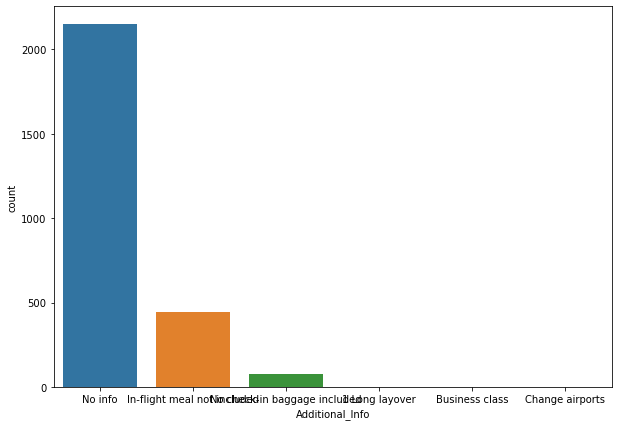

In [124]:
plt.figure(figsize=(10,7))
sns.countplot(flight_testing['Additional_Info'])

In [125]:
flight_testing['Route'].value_counts()

DEL ? BOM ? COK                624
BLR ? DEL                      389
CCU ? BOM ? BLR                253
CCU ? BLR                      172
BOM ? HYD                      164
                              ... 
BLR ? BDQ ? DEL                  1
BLR ? VGA ? VTZ ? DEL            1
BLR ? BOM ? IDR ? GWL ? DEL      1
CCU ? DEL ? COK ? TRV ? BLR      1
CCU ? BOM ? TRV ? BLR            1
Name: Route, Length: 100, dtype: int64

In [126]:
flight_testing['Route'].nunique()

100

<AxesSubplot:xlabel='Route', ylabel='count'>

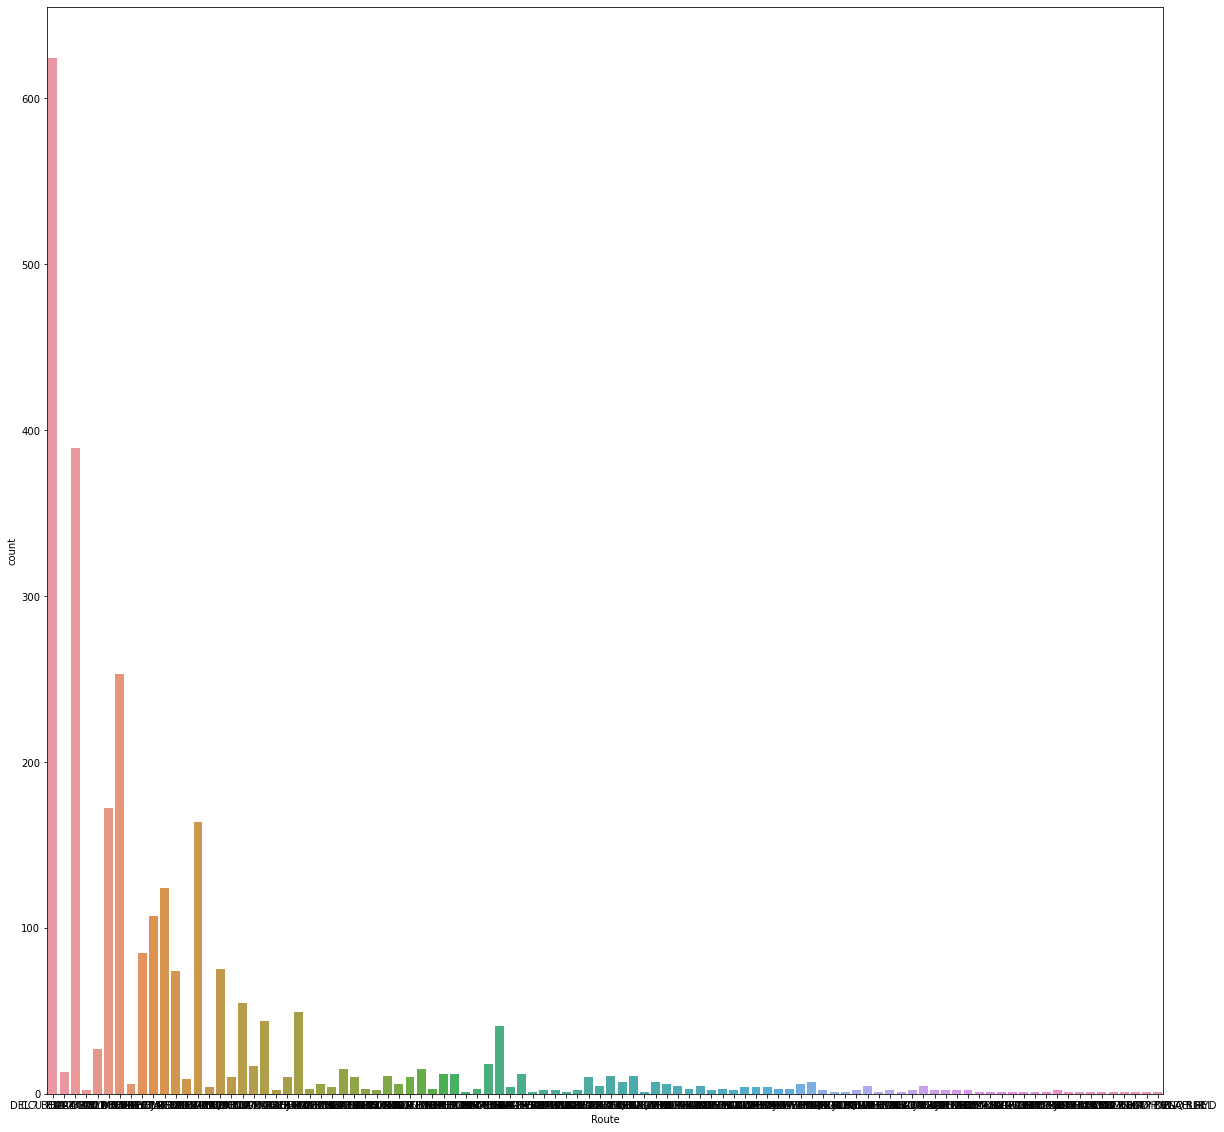

In [127]:
plt.figure(figsize=(20,20))
sns.countplot(flight_testing['Route'])

### Here we will not use any Bivariate Analysis  because our data has no label,we can do only univariate analysis

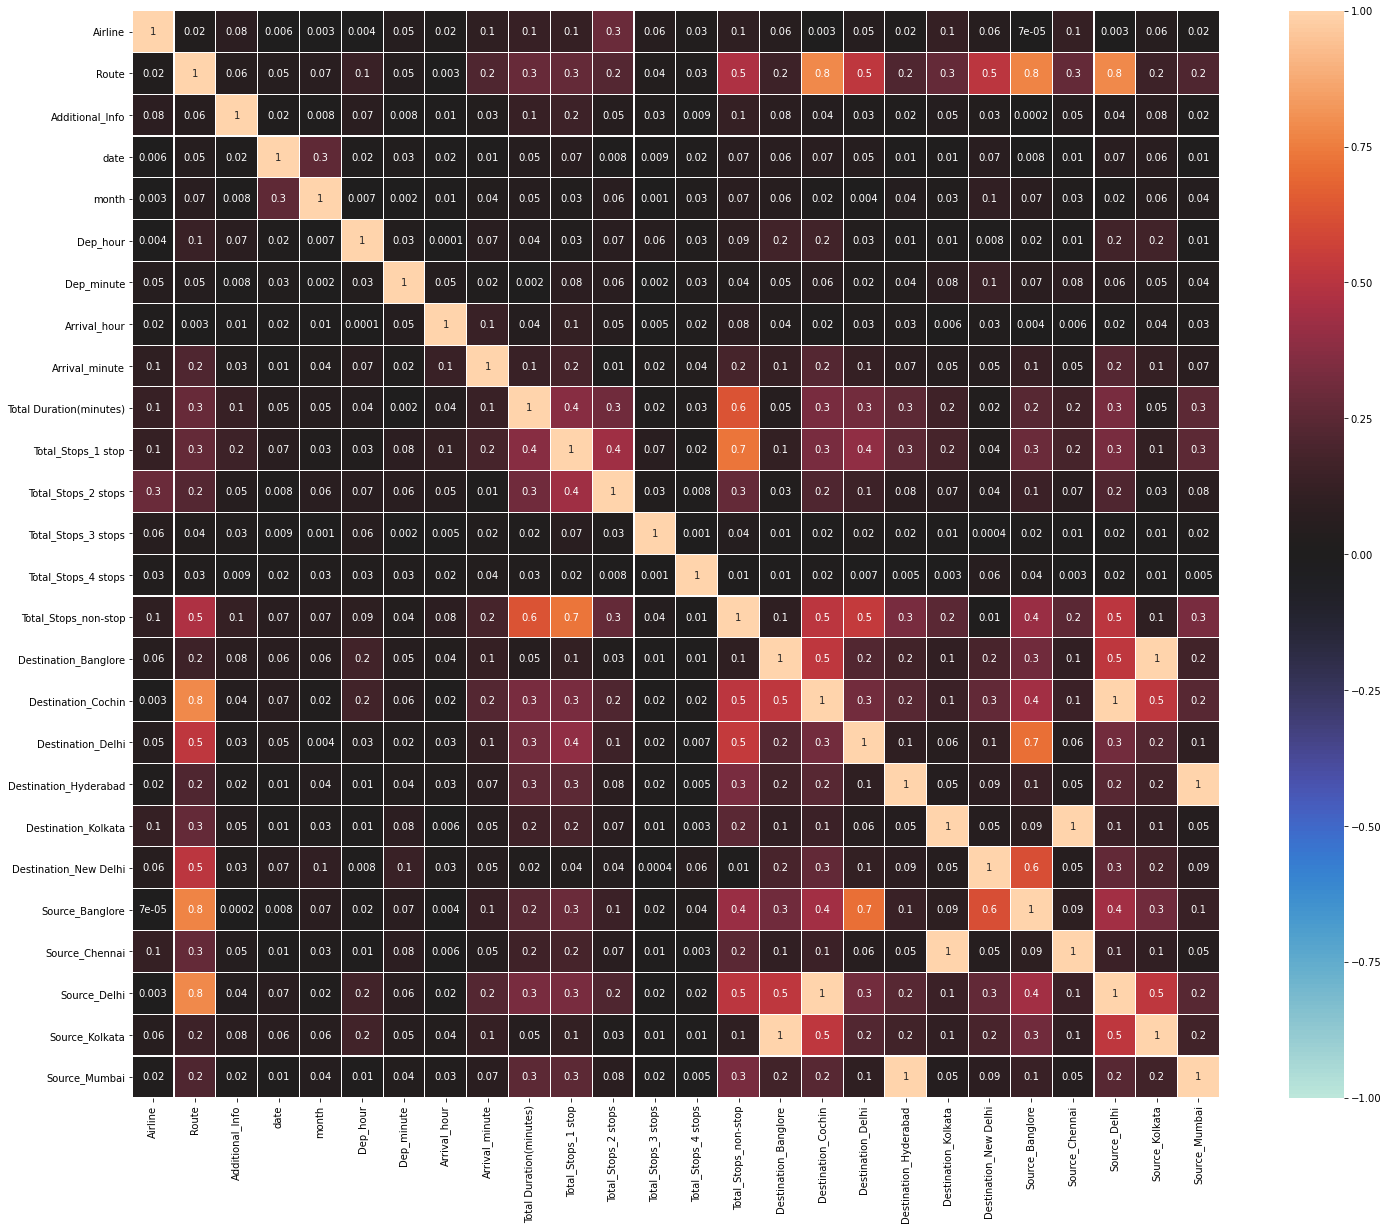

In [134]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
flight_testing_corr=flight_testing.corr().abs()
plt.figure(figsize=(25,20))
sns.heatmap(flight_testing_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

# Encoding

In [128]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

flight_testing['Route']=le.fit_transform(flight_testing['Route'])
flight_testing['Additional_Info']=le.fit_transform(flight_testing['Additional_Info'])
flight_testing['Airline']=le.fit_transform(flight_testing['Airline'])
flight_testing=pd.get_dummies(flight_testing,columns=['Total_Stops','Destination','Source'])

In [129]:
flight_testing.head()

,Airline,Route,Additional_Info,date,month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Total Duration(minutes),Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,4,76,5,6,6,17,30,4,25,655,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,3,65,5,5,12,6,20,10,20,240,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,4,76,3,21,5,19,15,19,0,1425,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,6,76,5,21,5,8,0,21,0,780,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,16,5,24,6,23,55,2,45,170,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [130]:
flight_testing.shape

(2671, 26)

In [131]:
# now load the model
model=joblib.load("Flight Price Prediction.pkl")
print(mod.predict(flight_testing))

[15318.  4226. 18581. ... 15318.  8879.  7268.]


Here we get predicted value for labels